In [63]:
import pandas as pd
import numpy as np 
csv_data = pd.read_csv("Index2018.csv")
df = csv_data.copy()


### Data Frame Understanding 

In [64]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [65]:
df.columns

Index(['date', 'spx', 'dax', 'ftse', 'nikkei'], dtype='object')

<Axes: title={'center': 'S&P 500 Price '}>

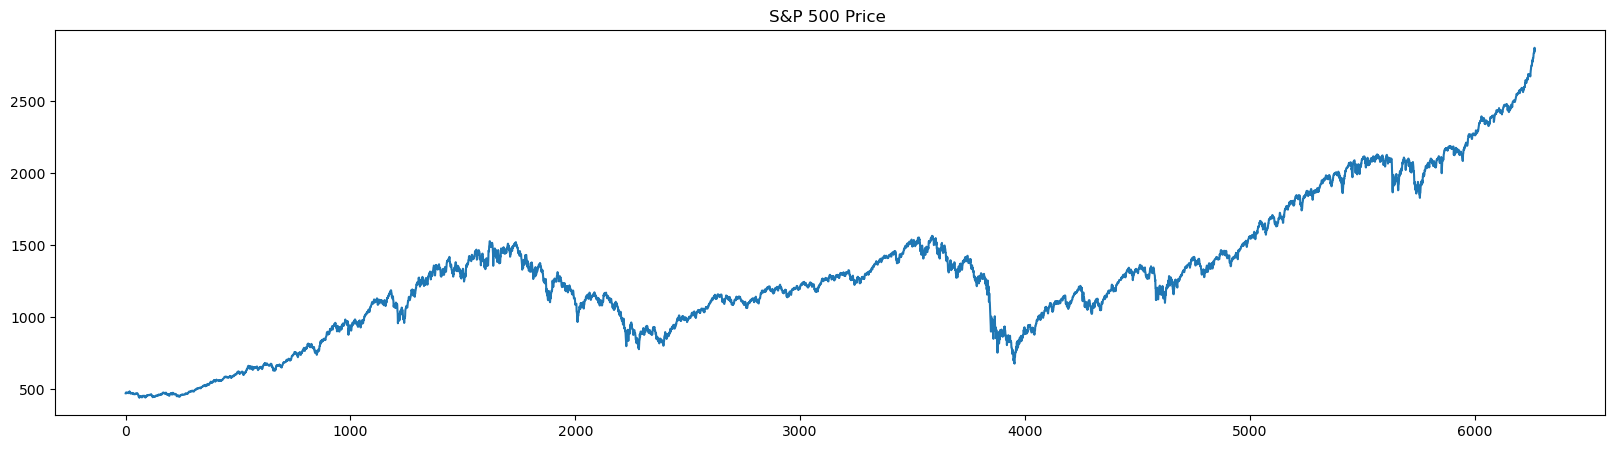

In [66]:
df.spx.plot(figsize=(20,5), title='S&P 500 Price ')

### Dealing with Time Series 

In [67]:
# Converting String to Date 
df.date = pd.to_datetime(df.date,dayfirst=True)
df.head()
# Converting Date column as index 
df.set_index("date", inplace=True)
df.head()


,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


#### setting the Desired Frequency 

In [68]:
# 'h' -> Hourly, 'd' -> Daily ,'w' -> Weekly, 'm'  -> Monthly , 'a' -> Annually 
# 'b' -> Buisness Day 
df = df.asfreq('b')
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


#### Handling Missing Value 

- Front filling  (ffill)
- Back filling   (bfiil)
- Average  Filling  (manually pass the value )
    

In [69]:
df.isna().sum()


spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [71]:
df.spx.ffill(inplace=True)
df.dax.bfill(inplace=True)
df.ftse.fillna(value=df.ftse.mean(),inplace=True)
df.nikkei.fillna(value=df.nikkei.mean(),inplace=True)


df.isna().sum()



spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### Auto Correlation 

In [74]:
for column in df :
    print(df[column].autocorr(5))
# df.describe()

0.9983434414779622
0.9977364526676368
0.9928829705143336
0.9927894134080342


### Stationarity 

In [75]:
import statsmodels as sts 

#### Auto Correlation Function 

#### Partially Auto Correlation Function 

### Auto Regressive Model 

$x_t = C+\varphi x_{t-1}+\varepsilon_t$